# Datation absolue avec Chrono.py

[Principe de la datation absolue ou radio-chronologie](https://github.com/YannBouyeron/SPET/blob/master/Geologie/Datation%20absolue.md)

### Télécharger Chrono.py

Télécharger depuis [Github](https://gist.github.com/YannBouyeron/e4d0315fbf3b2b67859aba84c8d9c352)

Avec git:

    git clone https://gist.github.com/e4d0315fbf3b2b67859aba84c8d9c352.git

Avec wget:

    wget https://gist.github.com/YannBouyeron/e4d0315fbf3b2b67859aba84c8d9c352/archive/15f7064b79d8f640a0c5e223133bdfa4d406a139.zip
    unzip 15f7064b79d8f640a0c5e223133bdfa4d406a139.zip
    

Le fichier chrono.py doit ensuite être placé dans votre repertoire de travail pour pouvoir être importé avec python.

### Importer matplotlib.pyplot

Si vous êtes dans jupyter:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Si vous travaillez en console linux sans interface graphique:

In [2]:
#import matplotlib
#import os

#if "DISPLAY" not in os.environ:
    
    #matplotlib.use("Agg")

#import matplotlib.pyplot as plt

### Importer Chrono.py

Attention le fichier Chrono.py doit se trouver dans le même repertoire que celui à partir duquel vous avez lancé python.

In [3]:
from chrono import Chrono
c = Chrono()

### Datation au <sup>14</sup>C

On mesure une concentration en <sup>14</sup>C de 3 dpm dans un échantillon.

On utlilise alors la méthode c14(dpm) pour retourner l'âge de l'échantillon et la courbe de désintégration du <sup>14</sup>C avec la position de la mesure.

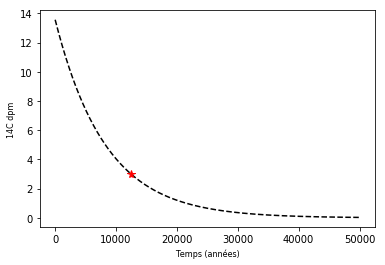

In [4]:
age = c.c14(3)

In [5]:
age

12467.041271439173

On peut aussi simplement afficher la courbe de désintégration du <sup>14</sup>C:

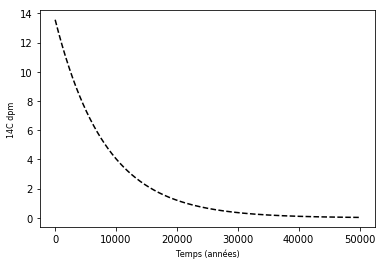

In [6]:
c.c14()

L'argument facultatif xmax permet de restreindre l'axe du temps en fixant un t max pour la représentation graphique:

12467.041271439173

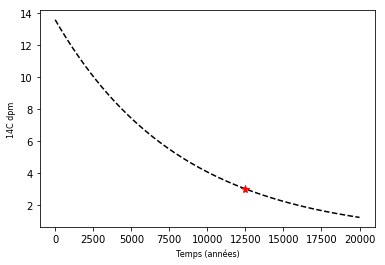

In [7]:
c.c14(3, xmax=20000)

### Datation par K/Ar

On utilise la méthode kar(k, Ar) avec k la concentration en <sup>40</sup>K et Ar la concentration en <sup>40</sup>Ar mesurées sur l'objet à dater.

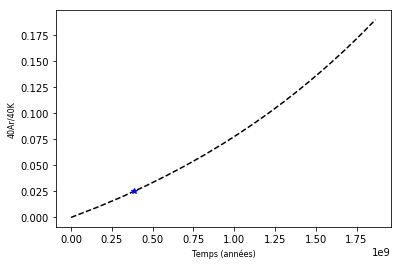

In [8]:
age = c.kar(0.008, 0.0002)

In [9]:
age

385910162.54356444

L'argument facultatif ymax (rapport k/Ar max) permet d'ajuster la représentation graphique:

385910162.54356444

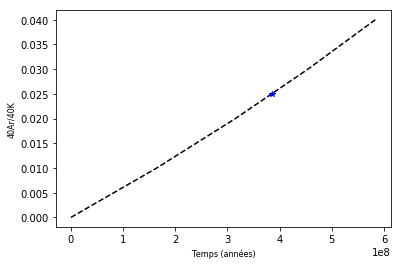

In [10]:
c.kar(0.008, 0.0002, ymax=0.05)

### La datation par U/Pb

[Fiche synthèse datation U/Pb](https://github.com/YannBouyeron/SPET/blob/master/Geologie/FS%20U:Pb.pdf)

**Premier exemple:**

On commence par tracer la concordia sur l'intervalle de temps présumé avec la méthode concordia:


In [11]:
help(c.concordia)

Help on method concordia in module chrono:

concordia(ti=0, tf=1000000000, incre=10000000, dotlabel=True, labelincre=3) method of chrono.Chrono instance
    Arguments:
    
            ti: age présumé inférieur à réouverture
    
            tf: age présumé superieur à age roche
    
            incre: incrément de temps pour la construction de la concordia en années
    
            dotlabel: si True (defaut): indication age sur concordia
    
            labelincre: icrémentation des labels des points de la concordia pour ne pas surcharger trop
    
    Return: array des points de la concordia.



(array([0.        , 0.01562075, 0.0314855 , 0.04759808, 0.06396234,
        0.08058223, 0.09746174, 0.11460491]),
 array([0.        , 0.10349785, 0.21770751, 0.34373762, 0.48281158,
        0.63627939, 0.80563079, 0.9925097 ]))

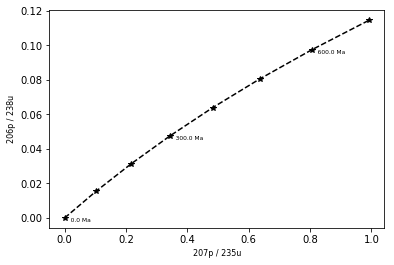

In [12]:
c.concordia(ti=0, tf=800000000.0, incre=100000000)

On ajoute ensuite nos mesures effectuées sur les zircons de l'échantillon de la roche:

In [13]:
pb206U = [0.06231448, 0.06247915, 0.06264385, 0.06280857, 0.06297332, 0.06313809,
 0.06330289, 0.06346772, 0.06363257, 0.06379744, 0.06396234]

In [14]:
pb207U = [0.46827978, 0.46972653, 0.4711747,  0.4726243,  0.47407533, 0.47552779,
 0.47698168, 0.478437, 0.47989376, 0.48135195, 0.48281158]

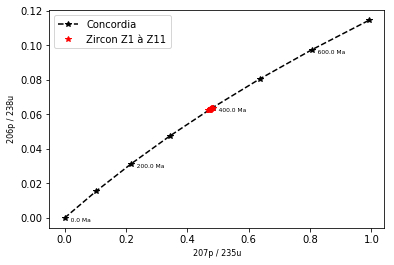

In [15]:
c.concordia(ti=0, tf=800000000.0, incre=100000000, labelincre=2)
plt.plot(pb207U, pb206U, "*r", label="Zircon Z1 à Z11")
plt.legend()

On observe que les mesures des rapports pb/u effectuées sur les zircons (ici en rouge) s'alignent sur la concordia. Il n'y a pas eu de réouverture du système. L'âge de la roche est l'âge du plus vieux zircon lisible sur le graphique, soit 400 Ma. Il n'est donc pas nécessaire d'afficher la discordia.

**Deuxième exemple:**

On dispose des mesures suivantes effectuées sur 3 zircons d'une roche:

In [16]:
pb207U = [5, 3, 1]

pb206U = [0.3, 0.2, 0.1]

On affiche la concordia et on place nos mesures sur le graphique:

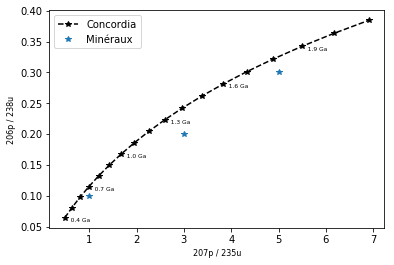

In [17]:
c.concordia(ti=0.4*10**9, tf=2.2*10**9, incre=100000000)
plt.plot(pb207U, pb206U, "*", label="Minéraux")
plt.legend()

On observe que les mesures effectuées sur les minéraux ne sont pas alignées sur la concordia. Il y'a eu une ré-ouverture du système. Il faut donc afficher la discordia avec la méthode upb :

In [18]:
help(c.upb)

Help on method upb in module chrono:

upb(p207, p206, ti=100000000, tf=2500000000.0, delta=100000, incre=100000000, dotlabel=True, labelincre=3) method of chrono.Chrono instance
    Arguments:
    
            p206: liste valeurs 206Pb/238U mesurées (Y)
    
            p207: liste valeurs 207Pb/235U mesurées (X)
    
            ti: age présumé inférieur à réouverture
    
            tf: age présumé superieur à age roche
    
            delta: precision du calcul des intercepts en années
    
            incre: incrément de temps pour la construction de la concordia en années
    
            dotlabel: si True (defaut): indication age sur concordia
    
            labelincre: incrémentation des labels des points de la concordia pour ne pas surcharger trop
    
    Show: graphique concordia discordia             
    Return: {coeff correlation discordia, intersup, interlow, a, b}



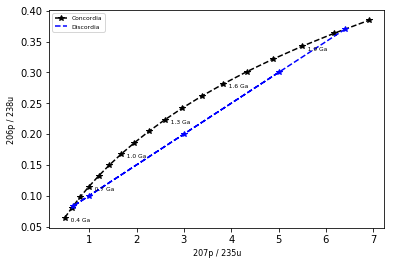

In [19]:
dico = c.upb(pb207U, pb206U, ti=0.4*10**9, tf=2.2*10**9, incre=100000000, delta=1000)

In [20]:
dico

{'R': 1.0,
 'sup': 2033986000.0,
 'low': 514235000.0,
 'a': 0.05000000000000001,
 'b': 0.049999999999999954}

La méthode retourne un dictionnaire avec l'âge de la ré-ouverture du système correspondant à l'intercept inférieur: low = 515093000 +/- delta années; l'âge de la roche correspondant à l'intercept supérieur: sup = 2033278000 +/- delta années. La précision des âges obtenus dépend du paramètre "delta" passé en argument de la méthode upb. 

Attention un delta faible augmente la précision, mais augmente aussi le temps des calculs.

### La datation par Rb/Sr

On utilise la méthode rbsr()

In [21]:
help(c.rbsr)

Help on method rbsr in module chrono:

rbsr(rbsr, srsr) method of chrono.Chrono instance
    Arguments:
    
            rbsr: liste rapport 87Rb/86Sr
    
            srsr: liste rapport 87Sr/86Sr
    
    Show graphique isochrone
    
    Return equation droite reg, age (en annees)



In [22]:
rbsr = [0.288, 0.31, 0.996, 0.787, 0.898, 0.945, 0.901, 5.84, 3.36]

srsr = [0.7165, 0.7171, 0.7556, 0.7413, 0.7471, 0.7521, 0.7495, 1.0133, 0.8807]

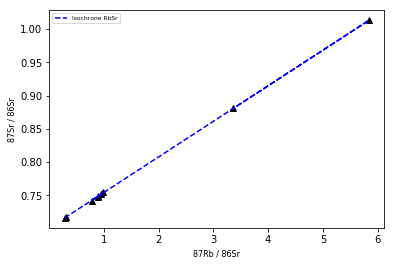

In [23]:
y , a = c.rbsr(rbsr, srsr)

In [24]:
# fonction de la droite isochrone

print(y)

y = 0.05354693x + 0.7


In [25]:
# age 

print(a)

3673415678.371164


La méthode creatRbsr(age) permet de créer des couples de valeurs rbsr et srsr fictifs en fonction de l'âge désiré.

In [26]:
help(c.creatRbsr)

Help on method creatRbsr in module chrono:

creatRbsr(age, n=5, b=0.7, out='') method of chrono.Chrono instance
    Création de données RbSr en fonction de l’age.
    
    Arguments:
    
            age: age désiré
            
            n: nombre de couples SrSr, RbSr
            
            b: ordonnée à l’origine = Sr/Sr à t0
    
            out: path en .xlsx ou en .json pour sauvegarder les données crées
    
    Show graphique isochrone
    
    Return RbSr (liste), SrSr (liste)



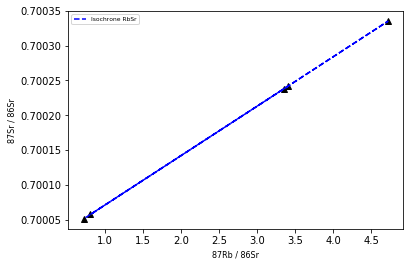

In [27]:
rbsr, srsr = c.creatRbsr(5000000)

In [28]:
rbsr

[3.4121768292137213,
 0.8064912819676335,
 3.35561547132785,
 4.719879018195903,
 0.7169241927330116]

In [29]:
srsr

[0.7002422731554695,
 0.7000572629138291,
 0.7002382571564933,
 0.7003351233070286,
 0.7000509034247342]

On peut vérifier l'âge en ré utilisant la méthode rbsr():

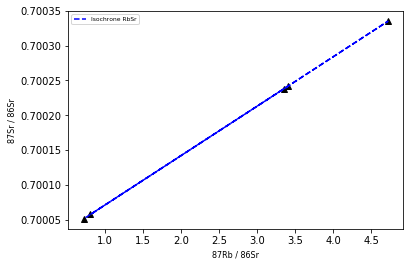

In [30]:
y , a = c.rbsr(rbsr, srsr)

In [31]:
a

5000000.000002835